In [115]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [104]:
bank_data = pd.read_csv("bank-full.csv",sep=';')  # sep use for delimiters

In [105]:
bank_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **EDA**

In [106]:
# Label Encoding of categrical variables
#one hot encoding create so many columns
le = LabelEncoder()
bank_data["job"] = le.fit_transform(bank_data["job"])
bank_data["marital"] = le.fit_transform(bank_data["marital"])
bank_data["education"] = le.fit_transform(bank_data["education"])
bank_data["contact"] = le.fit_transform(bank_data["contact"])
bank_data["poutcome"] = le.fit_transform(bank_data["poutcome"])
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,no,2143,yes,no,2,5,may,261,1,-1,0,3,no
1,44,9,2,1,no,29,yes,no,2,5,may,151,1,-1,0,3,no
2,33,2,1,1,no,2,yes,yes,2,5,may,76,1,-1,0,3,no
3,47,1,1,3,no,1506,yes,no,2,5,may,92,1,-1,0,3,no
4,33,11,2,3,no,1,no,no,2,5,may,198,1,-1,0,3,no


In [107]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int64 
 2   marital    45211 non-null  int64 
 3   education  45211 non-null  int64 
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  int64 
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int64 
 16  y          45211 non-null  object
dtypes: int64(12), object(5)
memory usage: 5.9+ MB


In [108]:
# Custom Binary Encoding of Binary o/p variables
bank_data['default'] = np.where(bank_data['default'].str.contains("yes"), 1, 0)
bank_data['housing'] = np.where(bank_data['housing'].str.contains("yes"), 1, 0)
bank_data['loan'] = np.where(bank_data['loan'].str.contains("yes"), 1, 0)
bank_data['y'] = np.where(bank_data['y'].str.contains("yes"), 1, 0)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0


In [109]:
bank_data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [110]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
bank_data=bank_data.replace(order)
#convert month column to numeric
bank_data["month"] = pd.to_numeric(bank_data["month"],errors = "coerce")
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


# **Model Building**

In [111]:
# Dividing our data into input and output variables
X = bank_data.iloc[:,0:16]
Y = bank_data.iloc[:,16]

In [112]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Model Prediction**

In [113]:
#Predict for X dataset

y_pred = classifier.predict(X)
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


# **Testing Model Accuracy**


In [114]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39174   748]
 [ 4376   913]]


In [116]:
#Classification report
## Precision – What percent of your predictions were correct?
## Recall – What percent of the positive cases did you catch?
## F1 score – What percent of positive predictions were correct?
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.55      0.17      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.72      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [117]:
classifier.predict_proba(X)

array([[0.93523776, 0.06476224],
       [0.9333311 , 0.0666689 ],
       [0.95172815, 0.04827185],
       ...,
       [0.62827955, 0.37172045],
       [0.95583606, 0.04416394],
       [0.62231398, 0.37768602]])

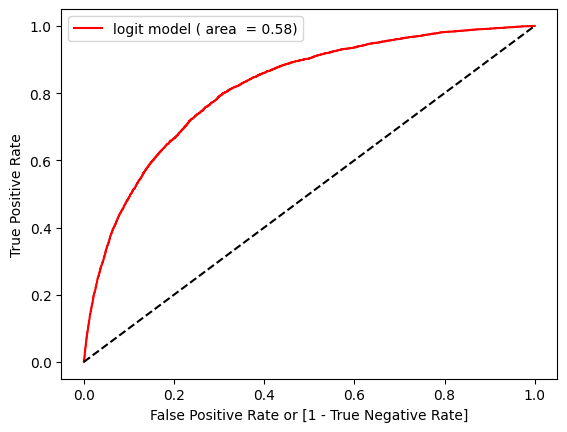

In [120]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, classifier.predict(X))

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [119]:
#accuracy
auc

0.5769429438264893